In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mn
%matplotlib inline

In [2]:
df1 = pd.read_csv('../Dataset/order_master.csv')
df1.head()

,ORDER_NBR,ORDER_LINE_NBR,CUSTOMER_NBR,PRODUCT_NBR,ORDER_PLATFORM,ORDER_DATE,ORDER_TIME,TOTAL_LINE_AMT
0,O150021637,1,151575901,P150028635,QVC.COM,2015-01-01,00:27:31,103.28
1,O150023737,1,151967484,P150028635,QVC.COM,2015-01-01,00:49:46,103.28
2,O157979478,1,153235967,P150028635,On Air,2015-01-01,00:20:21,103.28
3,O157979514,2,151376686,P150025286,On Air,2015-01-01,00:24:17,20.99
4,O150025459,1,152113883,P150048858,QVC.COM,2015-01-01,01:13:59,177.74


In [3]:
df1.dtypes

ORDER_NBR          object
ORDER_LINE_NBR      int64
CUSTOMER_NBR        int64
PRODUCT_NBR        object
ORDER_PLATFORM     object
ORDER_DATE         object
ORDER_TIME         object
TOTAL_LINE_AMT    float64
dtype: object

In [4]:
df1['ORDER_DATE'] = pd.to_datetime(df1['ORDER_DATE'])

In [5]:
df1.dtypes

ORDER_NBR                 object
ORDER_LINE_NBR             int64
CUSTOMER_NBR               int64
PRODUCT_NBR               object
ORDER_PLATFORM            object
ORDER_DATE        datetime64[ns]
ORDER_TIME                object
TOTAL_LINE_AMT           float64
dtype: object

In [6]:
df1.head()

,ORDER_NBR,ORDER_LINE_NBR,CUSTOMER_NBR,PRODUCT_NBR,ORDER_PLATFORM,ORDER_DATE,ORDER_TIME,TOTAL_LINE_AMT
0,O150021637,1,151575901,P150028635,QVC.COM,2015-01-01,00:27:31,103.28
1,O150023737,1,151967484,P150028635,QVC.COM,2015-01-01,00:49:46,103.28
2,O157979478,1,153235967,P150028635,On Air,2015-01-01,00:20:21,103.28
3,O157979514,2,151376686,P150025286,On Air,2015-01-01,00:24:17,20.99
4,O150025459,1,152113883,P150048858,QVC.COM,2015-01-01,01:13:59,177.74


In [7]:
df1 = df1.drop(['ORDER_NBR', 'ORDER_LINE_NBR', 'CUSTOMER_NBR', 'PRODUCT_NBR', 'ORDER_PLATFORM', 'ORDER_TIME'], axis=1)
df1 = df1.rename(columns={'ORDER_DATE': 'DATE'})
df1.head(10)

,DATE,TOTAL_LINE_AMT
0,2015-01-01,103.28
1,2015-01-01,103.28
2,2015-01-01,103.28
3,2015-01-01,20.99
4,2015-01-01,177.74
5,2015-01-01,32.56
6,2015-01-01,85.62
7,2015-01-01,202.56
8,2015-01-01,24.10
9,2015-01-01,31.20


In [8]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
df1 = df1['TOTAL_LINE_AMT'].groupby(df1['DATE']).agg(['sum']).reset_index()
df1.head(25)

,DATE,sum
0,2014-12-17,997
1,2015-01-01,3656258
2,2015-01-02,3473420
3,2015-01-03,4713863
4,2015-01-04,4250090
5,2015-01-05,3228927
6,2015-01-06,2956335
7,2015-01-07,3387351
8,2015-01-08,4471845
9,2015-01-09,3301963


In [9]:
df2 = pd.read_csv('../Dataset/product_airtime.csv')
df2.head()

,PRODUCT_NBR,ONAIR_DATE,ONAIR_START_TMS,ONAIR_END_TMS,ONAIR_MINS,HOST1,HOST2
0,P150028635,2015-01-02,2015-01-02 01:33:02,2015-01-02 01:58:20,25,NaN,NaN
1,P150028635,2015-01-02,2015-01-02 01:21:14,2015-01-02 01:32:48,12,NaN,NaN
2,P150028635,2015-01-01,2015-01-01 22:34:30,2015-01-01 22:58:17,24,NaN,NaN
3,P150028635,2015-01-01,2015-01-01 22:00:05,2015-01-01 22:33:02,33,NaN,NaN
4,P150028635,2015-01-01,2015-01-01 19:00:00,2015-01-01 19:00:01,0,NaN,NaN


In [10]:
df2.dtypes

PRODUCT_NBR         object
ONAIR_DATE          object
ONAIR_START_TMS     object
ONAIR_END_TMS       object
ONAIR_MINS         float64
HOST1               object
HOST2               object
dtype: object

In [11]:
df2['ONAIR_DATE'] = pd.to_datetime(df2['ONAIR_DATE'])

In [12]:
df2.dtypes

PRODUCT_NBR                object
ONAIR_DATE         datetime64[ns]
ONAIR_START_TMS            object
ONAIR_END_TMS              object
ONAIR_MINS                float64
HOST1                      object
HOST2                      object
dtype: object

In [13]:
df2.head()

,PRODUCT_NBR,ONAIR_DATE,ONAIR_START_TMS,ONAIR_END_TMS,ONAIR_MINS,HOST1,HOST2
0,P150028635,2015-01-02,2015-01-02 01:33:02,2015-01-02 01:58:20,25,NaN,NaN
1,P150028635,2015-01-02,2015-01-02 01:21:14,2015-01-02 01:32:48,12,NaN,NaN
2,P150028635,2015-01-01,2015-01-01 22:34:30,2015-01-01 22:58:17,24,NaN,NaN
3,P150028635,2015-01-01,2015-01-01 22:00:05,2015-01-01 22:33:02,33,NaN,NaN
4,P150028635,2015-01-01,2015-01-01 19:00:00,2015-01-01 19:00:01,0,NaN,NaN


In [14]:
df2 = df2.drop(['PRODUCT_NBR','ONAIR_START_TMS','ONAIR_END_TMS','HOST1', 'HOST2'], axis=1)
df2 = df2.rename(columns={'ONAIR_DATE': 'DATE'})
df2.head(10)

,DATE,ONAIR_MINS
0,2015-01-02,25
1,2015-01-02,12
2,2015-01-01,24
3,2015-01-01,33
4,2015-01-01,0
5,2015-01-01,0
6,2015-01-01,11
7,2015-01-01,33
8,2015-01-01,1
9,2015-01-01,0


In [15]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df2 = df2['ONAIR_MINS'].groupby(df2['DATE']).agg(['sum']).reset_index()
df2.head(25)

,DATE,sum
0,2015-01-01,2688.49
1,2015-01-02,2690.80
2,2015-01-03,2701.18
3,2015-01-04,2716.47
4,2015-01-05,2675.34
5,2015-01-06,2692.43
6,2015-01-07,2700.92
7,2015-01-08,2602.05
8,2015-01-09,2681.60
9,2015-01-10,2688.84


In [16]:
df3 = pd.read_csv('../Dataset/email_campaign.csv')
df3.head()

,CAMPAIGN_DATE,PRODUCT_CATEGORY,CAMPAIGN_SPEND
0,1/1/2015,All,7191.95
1,1/1/2015,Accessories,1493.85
2,1/1/2015,Jewelry,380.53
3,1/2/2015,"Apparel, Accessories & Jewelry",531.87
4,1/5/2015,Apparel & Accessories,3788.44


In [17]:
df3.dtypes

CAMPAIGN_DATE        object
PRODUCT_CATEGORY     object
CAMPAIGN_SPEND      float64
dtype: object

In [18]:
df3['CAMPAIGN_DATE'] = pd.to_datetime(df3['CAMPAIGN_DATE'])

In [19]:
df3.dtypes

CAMPAIGN_DATE       datetime64[ns]
PRODUCT_CATEGORY            object
CAMPAIGN_SPEND             float64
dtype: object

In [20]:
df3.head()

,CAMPAIGN_DATE,PRODUCT_CATEGORY,CAMPAIGN_SPEND
0,2015-01-01,All,7191.95
1,2015-01-01,Accessories,1493.85
2,2015-01-01,Jewelry,380.53
3,2015-01-02,"Apparel, Accessories & Jewelry",531.87
4,2015-01-05,Apparel & Accessories,3788.44


In [21]:
df3 = df3.drop(['PRODUCT_CATEGORY'], axis=1)
df3 = df3.rename(columns={'CAMPAIGN_DATE': 'DATE'})
df3.head(10)

,DATE,CAMPAIGN_SPEND
0,2015-01-01,7191.95
1,2015-01-01,1493.85
2,2015-01-01,380.53
3,2015-01-02,531.87
4,2015-01-05,3788.44
5,2015-01-08,8632.31
6,2015-01-15,62.09
7,2015-01-16,5306.11
8,2015-01-17,2028.67
9,2015-01-19,1270.00


In [22]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df3 = df3['CAMPAIGN_SPEND'].groupby(df3['DATE']).agg(['sum']).reset_index()
df3.head(25)

,DATE,sum
0,2015-01-01,9066.33
1,2015-01-02,531.87
2,2015-01-05,3788.44
3,2015-01-08,8632.31
4,2015-01-15,62.09
5,2015-01-16,5306.11
6,2015-01-17,2028.67
7,2015-01-19,1270.00
8,2015-01-21,5061.12
9,2015-01-23,1029.70


In [23]:
df4 = pd.read_csv('../Dataset/social.csv')
df4.head()

,ID,SOURCE_TYPE,INTERACTION_DATE,POST,SENTIMENT
0,1039,FORUMS,3/31/15 00:00:00 EST,By that they showed that Auralux Skin Care is ...,Neutral
1,1040,FORUMS,3/31/15 00:00:00 EST,"Now, my grandson will be able to do his homesc...",Positive
2,1041,FORUMS,3/31/15 00:00:00 EST,The company name is Bohus Biotech.,Neutral
3,1042,FORUMS,3/31/15 00:00:00 EST,so today I decided to google it to find out.,Neutral
4,1043,FORUMS,3/31/15 00:00:00 EST,Is there nowhere you could add a little room o...,Neutral


In [24]:
df4.dtypes

ID                   int64
SOURCE_TYPE         object
INTERACTION_DATE    object
POST                object
SENTIMENT           object
dtype: object

In [25]:
df4['INTERACTION_DATE'] = pd.to_datetime(df4['INTERACTION_DATE'])
df4['INTERACTION_DATE'] = df4['INTERACTION_DATE'].apply(lambda x: x.date())

In [26]:
df4.dtypes

ID                   int64
SOURCE_TYPE         object
INTERACTION_DATE    object
POST                object
SENTIMENT           object
dtype: object

In [27]:
df4['INTERACTION_DATE'] = pd.to_datetime(df4['INTERACTION_DATE'])

In [28]:
df4.dtypes

ID                           int64
SOURCE_TYPE                 object
INTERACTION_DATE    datetime64[ns]
POST                        object
SENTIMENT                   object
dtype: object

In [29]:
df4.head()

,ID,SOURCE_TYPE,INTERACTION_DATE,POST,SENTIMENT
0,1039,FORUMS,2015-03-31,By that they showed that Auralux Skin Care is ...,Neutral
1,1040,FORUMS,2015-03-31,"Now, my grandson will be able to do his homesc...",Positive
2,1041,FORUMS,2015-03-31,The company name is Bohus Biotech.,Neutral
3,1042,FORUMS,2015-03-31,so today I decided to google it to find out.,Neutral
4,1043,FORUMS,2015-03-31,Is there nowhere you could add a little room o...,Neutral


In [30]:
df4 = df4.drop(['ID','SOURCE_TYPE','POST'], axis=1)
df4 = df4.rename(columns={'INTERACTION_DATE': 'DATE'})
df4.head(10)

,DATE,SENTIMENT
0,2015-03-31,Neutral
1,2015-03-31,Positive
2,2015-03-31,Neutral
3,2015-03-31,Neutral
4,2015-03-31,Neutral
5,2015-03-31,Positive
6,2015-03-31,Neutral
7,2015-03-31,Positive
8,2015-03-31,Neutral
9,2015-03-31,Strongly negative


In [31]:
df4['SENTIMENT'].unique()

array(['Neutral', 'Positive', 'Strongly negative', 'Strongly positive',
       'Negative'], dtype=object)

In [32]:
df4['SENTIMENT'].replace(['Strongly positive', 'Positive', 'Neutral', 'Negative', 'Strongly negative'],[5,4,3,2,1],inplace=True)
df4.head(25)

,DATE,SENTIMENT
0,2015-03-31,3
1,2015-03-31,4
2,2015-03-31,3
3,2015-03-31,3
4,2015-03-31,3
5,2015-03-31,4
6,2015-03-31,3
7,2015-03-31,4
8,2015-03-31,3
9,2015-03-31,1


In [33]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df4 = df4['SENTIMENT'].groupby(df4['DATE']).agg(['mean']).reset_index()
df4.head(25)

,DATE,mean
0,2015-03-01,3.39
1,2015-03-02,3.25
2,2015-03-03,3.24
3,2015-03-04,3.24
4,2015-03-05,3.23
5,2015-03-06,3.16
6,2015-03-07,3.16
7,2015-03-08,3.21
8,2015-03-09,3.22
9,2015-03-10,3.21


In [34]:
mdf1 = pd.merge(df1,df2, on='DATE',how='left')
mdf1.head(25)

,DATE,sum_x,sum_y
0,2014-12-17,997.34,nan
1,2015-01-01,3656258.22,2688.49
2,2015-01-02,3473419.96,2690.80
3,2015-01-03,4713863.20,2701.18
4,2015-01-04,4250090.42,2716.47
5,2015-01-05,3228926.72,2675.34
6,2015-01-06,2956334.95,2692.43
7,2015-01-07,3387351.47,2700.92
8,2015-01-08,4471844.69,2602.05
9,2015-01-09,3301962.61,2681.60


In [35]:
mdf2 = pd.merge(mdf1,df3, on='DATE',how='left')
mdf2.head(25)

,DATE,sum_x,sum_y,sum
0,2014-12-17,997.34,nan,nan
1,2015-01-01,3656258.22,2688.49,9066.33
2,2015-01-02,3473419.96,2690.80,531.87
3,2015-01-03,4713863.20,2701.18,nan
4,2015-01-04,4250090.42,2716.47,nan
5,2015-01-05,3228926.72,2675.34,3788.44
6,2015-01-06,2956334.95,2692.43,nan
7,2015-01-07,3387351.47,2700.92,nan
8,2015-01-08,4471844.69,2602.05,8632.31
9,2015-01-09,3301962.61,2681.60,nan


In [36]:
df = pd.merge(mdf2,df4, on='DATE',how='left')
df.dropna(thresh=3, inplace=True)
df.head(25)

,DATE,sum_x,sum_y,sum,mean
1,2015-01-01,3656258.22,2688.49,9066.33,nan
2,2015-01-02,3473419.96,2690.80,531.87,nan
3,2015-01-03,4713863.20,2701.18,nan,nan
4,2015-01-04,4250090.42,2716.47,nan,nan
5,2015-01-05,3228926.72,2675.34,3788.44,nan
6,2015-01-06,2956334.95,2692.43,nan,nan
7,2015-01-07,3387351.47,2700.92,nan,nan
8,2015-01-08,4471844.69,2602.05,8632.31,nan
9,2015-01-09,3301962.61,2681.60,nan,nan
10,2015-01-10,4481776.35,2688.84,nan,nan


In [37]:
df = df.fillna(0)
df = df.rename(columns={'sum_x': 'Sales', 'sum_y':'OnAirMins', 'sum':'CampaignSpend', 'mean':'AvgSentimentScore'})
df.head(10)

,DATE,Sales,OnAirMins,CampaignSpend,AvgSentimentScore
1,2015-01-01,3656258.22,2688.49,9066.33,0.00
2,2015-01-02,3473419.96,2690.80,531.87,0.00
3,2015-01-03,4713863.20,2701.18,0.00,0.00
4,2015-01-04,4250090.42,2716.47,0.00,0.00
5,2015-01-05,3228926.72,2675.34,3788.44,0.00
6,2015-01-06,2956334.95,2692.43,0.00,0.00
7,2015-01-07,3387351.47,2700.92,0.00,0.00
8,2015-01-08,4471844.69,2602.05,8632.31,0.00
9,2015-01-09,3301962.61,2681.60,0.00,0.00
10,2015-01-10,4481776.35,2688.84,0.00,0.00


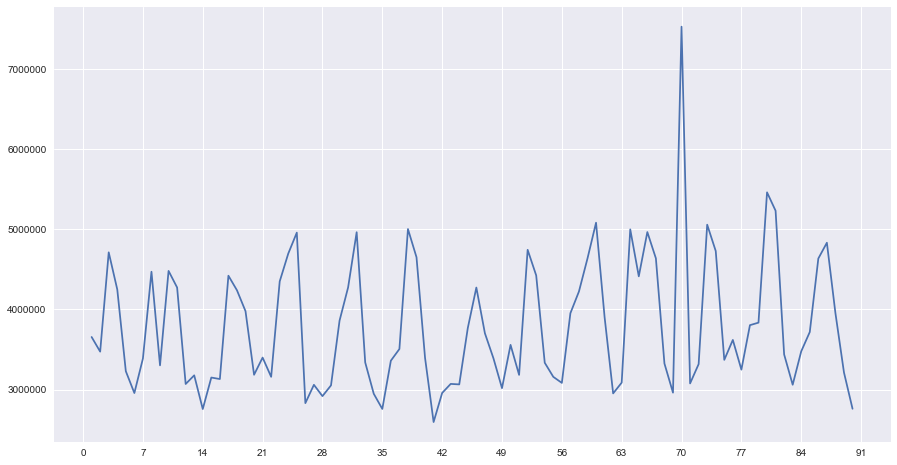

In [38]:
plt.figure(figsize=(15,8))
plt.xticks([0, 7, 14, 21, 28, 35, 42,49,56,63, 70, 77, 84, 91])
plt.plot(df['Sales'])


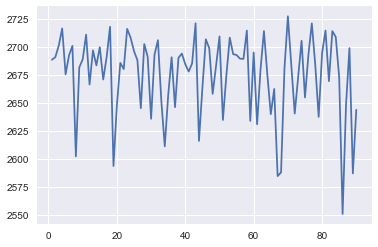

In [39]:
# Is this a good predictor?
plt.plot(df['OnAirMins'])

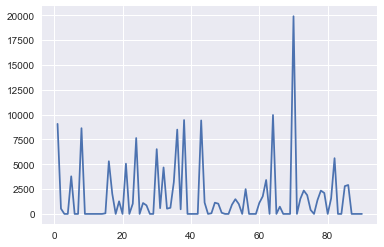

In [40]:
# Is this a good predictor?
plt.plot(df['CampaignSpend'])

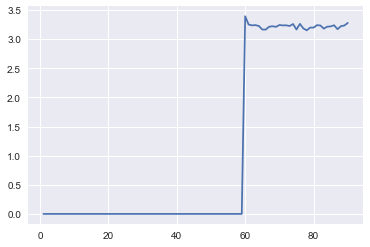

In [41]:
# Is this a good predictor?
plt.plot(df['AvgSentimentScore'])

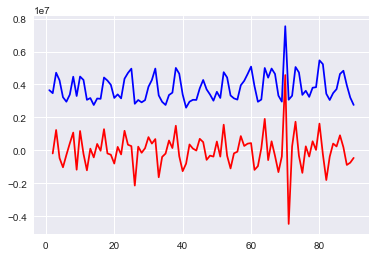

In [42]:
# Feature Engineering lag as a predictor
df['Lag1'] = df['Sales'] - df['Sales'].shift(1)
plt.plot(df['Lag1'], 'r-')
plt.plot(df['Sales'], 'b-')


In [43]:
# Feature Engineering Weekday as a predictor
df['Weekday'] = df['DATE'].apply(lambda x: x.weekday())
df.dropna(inplace=True)
df.head()

,DATE,Sales,OnAirMins,CampaignSpend,AvgSentimentScore,Lag1,Weekday
2,2015-01-02,3473419.96,2690.80,531.87,0.00,-182838.26,4
3,2015-01-03,4713863.20,2701.18,0.00,0.00,1240443.24,5
4,2015-01-04,4250090.42,2716.47,0.00,0.00,-463772.78,6
5,2015-01-05,3228926.72,2675.34,3788.44,0.00,-1021163.70,0
6,2015-01-06,2956334.95,2692.43,0.00,0.00,-272591.77,1


In [44]:
df['Sales'] = df['Sales'] / 1000

In [45]:
df.head()

,DATE,Sales,OnAirMins,CampaignSpend,AvgSentimentScore,Lag1,Weekday
2,2015-01-02,3473.42,2690.80,531.87,0.00,-182838.26,4
3,2015-01-03,4713.86,2701.18,0.00,0.00,1240443.24,5
4,2015-01-04,4250.09,2716.47,0.00,0.00,-463772.78,6
5,2015-01-05,3228.93,2675.34,3788.44,0.00,-1021163.70,0
6,2015-01-06,2956.33,2692.43,0.00,0.00,-272591.77,1


In [46]:
df.index

Int64Index([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
            36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
            53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
            70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
            87, 88, 89, 90],
           dtype='int64')

In [47]:
X = df.iloc[:,2:7].values
y = df.iloc[:,1:2].values
print "Shape of Y = ", y.shape
print "Dimension of Y =", y.ndim
y = y.ravel() #necessary to flatten the dataframe to 1D numpy array
print "After flattening (ravel) Shape of Y = ", y.shape
print "After flattening (ravel) Dimension of Y = ", y.ndim
X_train = X[:75]
X_test = X[75:]
y_train = y[:75]
y_test = y[75:]

Shape of Y =  (89L, 1L)
Dimension of Y = 2
After flattening (ravel) Shape of Y =  (89L,)
After flattening (ravel) Dimension of Y =  1


In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from math import sqrt


pipe_rf = Pipeline([('scl', StandardScaler()), ('reg', RandomForestRegressor(random_state=1))])

estimator_range = [100, 1000]
min_samples_split = [2, 4]
min_samples_leaf = [1, 2]


param_grid = {'reg__n_estimators': estimator_range, 'reg__min_samples_split': min_samples_split,
              'reg__min_samples_leaf':min_samples_leaf }
    
gs = GridSearchCV(estimator=pipe_rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

scores = cross_val_score(gs, X_train, y_train, scoring='neg_mean_squared_error', cv=2)

print np.mean(np.sqrt(-scores))

gs = gs.fit(X_train,y_train)

print "Best Params = ", gs.best_params_

rfr = gs.best_estimator_
rfr.fit(X_train, y_train)

print "Train Set: Root Mean Squared Error = ", np.sqrt(mean_squared_error(y_train, rfr.predict(X_train)))
print "Test Set: Root Mean Squared Error = ", np.sqrt(mean_squared_error(y_test, rfr.predict(X_test)))


C:\Users\prati\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\prati\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


524.479528381
Best Params =  {'reg__min_samples_leaf': 1, 'reg__n_estimators': 1000, 'reg__min_samples_split': 2}
Train Set: Root Mean Squared Error =  188.213333644
Test Set: Root Mean Squared Error =  460.803034675


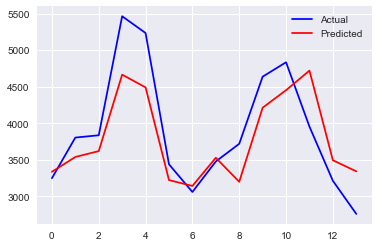

In [49]:
plt.plot(y_test, 'b-', label = 'Actual')
plt.plot(rfr.predict(X_test), 'r-', label = 'Predicted')
plt.legend()

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from math import sqrt


pipe_rf = Pipeline([('scl', StandardScaler()), ('reg', GradientBoostingRegressor(random_state=1))])

estimator_range = [100, 1000]
learning_rate = [0.1, 0.5, 1]
max_depth = [3, 4, 5]
subsample = [0.5, 1]

param_grid = {'reg__n_estimators': estimator_range, 'reg__learning_rate': learning_rate, 'reg__max_depth': max_depth, 
              'reg__subsample': subsample }

gs = GridSearchCV(estimator=pipe_rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

scores = cross_val_score(gs, X_train, y_train, scoring='neg_mean_squared_error', cv=2)

print np.mean(np.sqrt(-scores))


gs = gs.fit(X_train,y_train)

print "Best Params = ", gs.best_params_

gbr = gs.best_estimator_
gbr.fit(X_train, y_train)

print "Train Set: Root Mean Squared Error = ", np.sqrt(mean_squared_error(y_train, gbr.predict(X_train)))
print "Test Set: Root Mean Squared Error = ", np.sqrt(mean_squared_error(y_test, gbr.predict(X_test)))



573.11390293
Best Params =  {'reg__max_depth': 4, 'reg__learning_rate': 1, 'reg__subsample': 1, 'reg__n_estimators': 100}
Train Set: Root Mean Squared Error =  0.000310576585897
Test Set: Root Mean Squared Error =  619.118068609


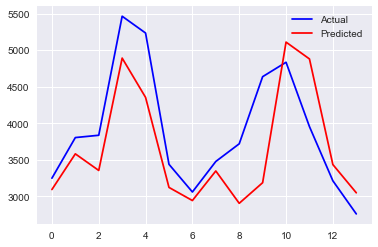

In [51]:
plt.plot(y_test, 'b-', label = 'Actual')
plt.plot(gbr.predict(X_test), 'r-', label = 'Predicted')
plt.legend()